# MPlots
Jugando con los MatrixProfile & MPlots comenzando con el tutorial de Stumpy
https://stumpy.readthedocs.io/en/latest/Tutorial_The_Matrix_Profile.html

In [1]:
import numpy as np
import dvats.memory as mem
import dvats.mplots as mp


Octave is ready <oct2py.core.Oct2Py object at 0x7fad1a2d0040>

















In [2]:
mps = mp.MatrixProfiles()

In [3]:
#Common
mps.data = np.random.rand(10000)
mps.subsequence_len = 50
print("Ts ~ ", mps.data.shape)
print("Expected mp length: ", int(np.floor(mps.data.shape[0]-mps.subsequence_len+1)))

Ts ~  (10000,)
Expected mp length:  9951


## Compute & Save Matrix Profile 
> using both stumpy.stump & scamp

In [4]:
mps.compute(
    method     = 'stump_gpu',  
    verbose    = 1, 
    debug      = True, 
    time_flag  = True
)
print("Total MPs: ", len(mps.matrix_profiles))
print(mps.matrix_profiles[0])

/usr/local/share/miniconda3/envs/env/lib/python3.10/site-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 20 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


Before Mps.len: 0
After Mps.len: 1
MPs | compute -> Subsequence len outside:  50
MPs | compute -> Subsequence len inside:  50
MPs | compute -> method outside:  stump_gpu
MPs | compute -> method inside:  stump_gpu
Total MPs:  1
MP: [6.282438223067662 6.6698081726637035 6.774065227725141 ...
 6.7238905798163495 6.618654479650668 7.047145551313778]
Ids: [2153 2154 2155 ... 4611 4612 3560]
Ids_left: [-1 -1 -1 ... 4611 4612 3560]
Ids_right: [2153 2154 2155 ... -1 -1 -1]
Computation_time: 5.939995050430298
subsequence_len: 50
method: stump_gpu


In [5]:
# Compute & Save Matrix Profile using both stumpy.stump & scamp
mps.compute('stump_gpu',  verbose = 1, debug = True, time_flag = True)
print("Total MPs: ", len(mps.matrix_profiles))
print(mps.matrix_profiles[0])
mps.compute('scamp',  verbose = 1, debug = True, time_flag = True)
print("Total MPs: ", len(mps.matrix_profiles))
print(mps.matrix_profiles[1])

Before Mps.len: 1
After Mps.len: 2
MPs | compute -> Subsequence len outside:  50
MPs | compute -> Subsequence len inside:  50
MPs | compute -> method outside:  stump_gpu
MPs | compute -> method inside:  stump_gpu
Total MPs:  2
MP: [6.282438223067662 6.6698081726637035 6.774065227725141 ...
 6.7238905798163495 6.618654479650668 7.047145551313778]
Ids: [2153 2154 2155 ... 4611 4612 3560]
Ids_left: [-1 -1 -1 ... 4611 4612 3560]
Ids_right: [2153 2154 2155 ... -1 -1 -1]
Computation_time: 5.939995050430298
subsequence_len: 50
method: stump_gpu
Before Mps.len: 2
After Mps.len: 3
MPs | compute -> Subsequence len outside:  50
MPs | compute -> Subsequence len inside:  50
MPs | compute -> method outside:  scamp
MPs | compute -> method inside:  scamp
Total MPs:  3
MP: [6.282438223067662 6.6698081726637035 6.774065227725141 ...
 6.7238905798163495 6.618654479650668 7.047145551313778]
Ids: [2153 2154 2155 ... 4611 4612 3560]
Ids_left: [-1 -1 -1 ... 4611 4612 3560]
Ids_right: [2153 2154 2155 ... -1 -

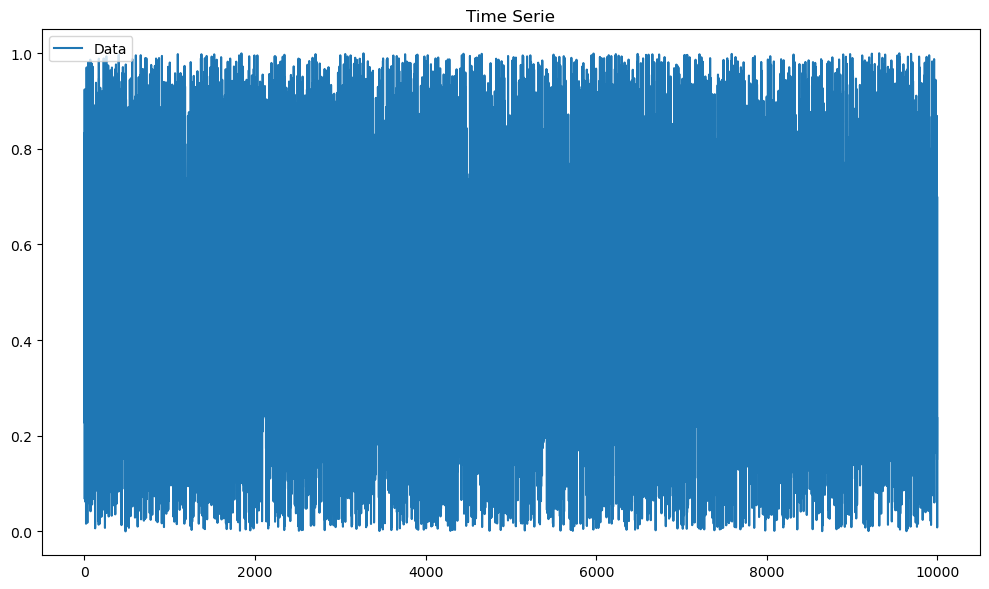

In [6]:
mps.plot([])

### Ejemplo de STUMPY Basics - Analyzing Motifs and Anomalies with STUMP and SCAMP
https://stumpy.readthedocs.io/en/latest/Tutorial_The_Matrix_Profile.html

In [7]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.patches import Rectangle
import datetime as dt

plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

In [8]:
steam_df = pd.read_csv("https://zenodo.org/record/4273921/files/STUMPY_Basics_steamgen.csv?download=1")
steam_df.head()

drum pressure  excess oxygen  water level  steam flow
0      320.08239       2.506774     0.032701    9.302970
1      321.71099       2.545908     0.284799    9.662621
2      320.91331       2.360562     0.203652   10.990955
3      325.00252       0.027054     0.326187   12.430107
4      326.65276       0.285649     0.753776   13.681666

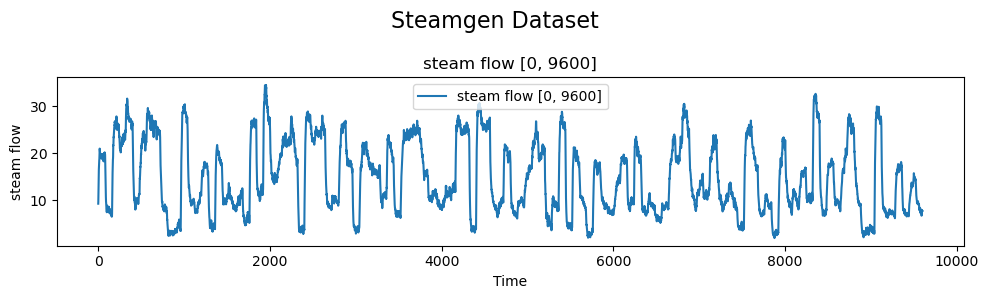

In [9]:
mp.plot_dataFrame('Steamgen Dataset', steam_df, [3])

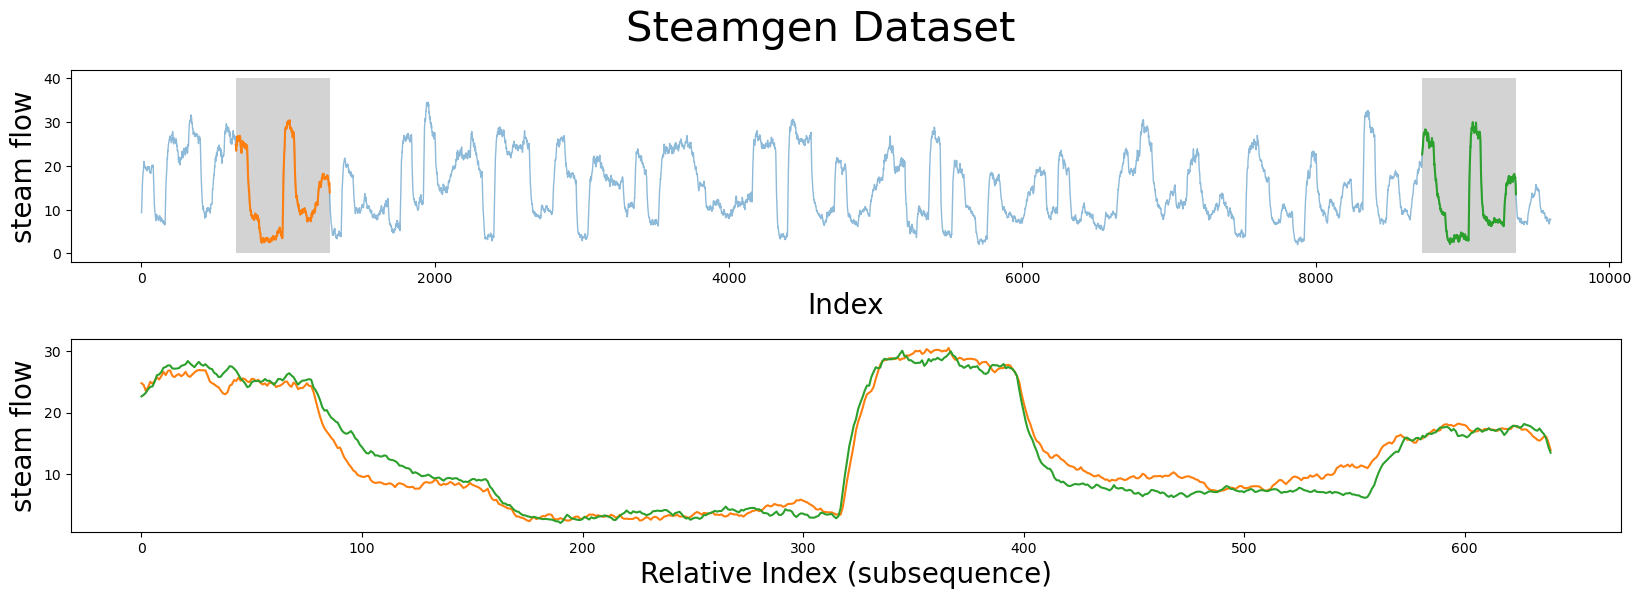

In [10]:
mp.plot_dataFrame_compareSubsequences('Steamgen Dataset', steam_df, 3, 640, 643, 8724)

In [11]:
steam_mps = mp.MatrixProfiles()
steam_mps.subsequence_len = 640
steam_mps.data = steam_df['steam flow']
steam_mps.compute('stump', verbose = 0, debug = False, time_flag = True)
steam_mps.compute('scamp', verbose = 0, debug = False, time_flag = True)

MatrixProfile(data=array([ 9.3029701,  9.6626206, 10.990955 , ...,  7.8568536,  7.799764 ,
        7.7678673]), data_b=None, self_join=True, distances=array([16.23541  , 16.081919 , 15.909404 , ...,  9.02293  ,  9.0382595,
        9.054692 ], dtype=float32), computation_time=0.12420964241027832, subsequence_len=640, method='scamp', current_index_pos_plot=0, max_points=10000, show_full=False, index=array([2242, 2243, 2245, ...,  877,  878,  879], dtype=int32), index_left=[], index_right=[], motif_idx=0, motif_nearest_neighbor_idx=0, motif_nearest_neighbor_idx_left=0, motif_nearest_neighbor_idx_right=0, discord_idx=0, discord_nearest_neighbor_idx=0, discord_nearest_neighbor_idx_left=0, discord_nearest_neighbor_idx_right=0, dominant_lens=None)

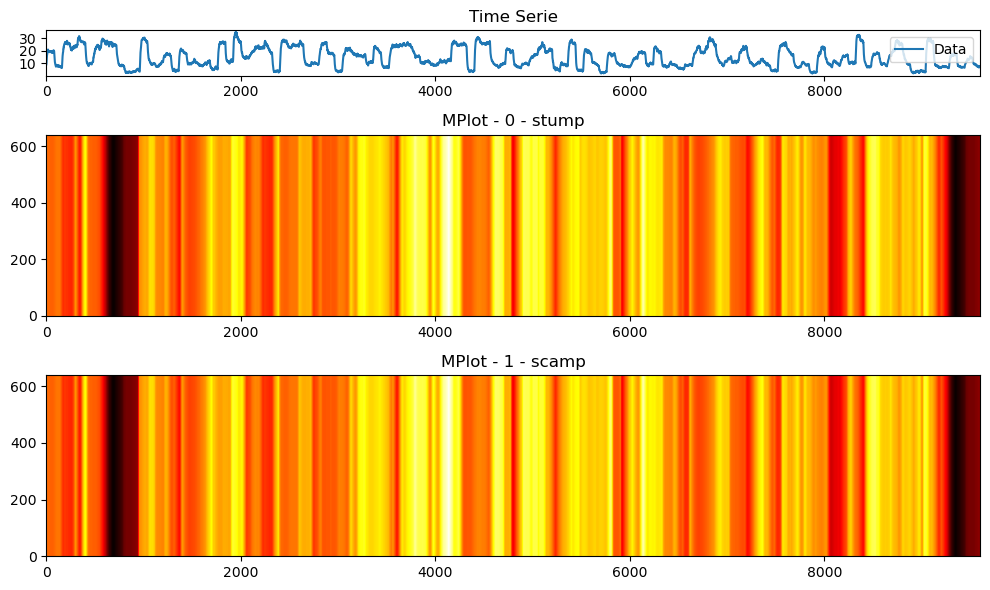

In [12]:
steam_mps.plot()

In [13]:
print("Ts ~ ", steam_mps.data.shape)
print("Expected mp length: ", int(np.floor(steam_mps.data.shape[0]-steam_mps.subsequence_len+1)))
print("mp_stumpy ~", steam_mps.matrix_profiles[0].distances.shape)
print("mp_scamp ~", steam_mps.matrix_profiles[1].distances.shape)
print(steam_mps.matrix_profiles[0])
print(steam_mps.matrix_profiles[1])

Ts ~  (9600,)
Expected mp length:  8961
mp_stumpy ~ (8961,)
mp_scamp ~ (8961,)
MP: [16.23541147724783 16.08191866323061 15.909403017873444 ...
 9.02293137221496 9.038259675949304 9.054692514421284]
Ids: [2242 2243 2245 ... 877 878 879]
Ids_left: [-1 -1 -1 ... 877 878 879]
Ids_right: [2242 2243 2245 ... -1 -1 -1]
Computation_time: 17.1111056804657
subsequence_len: 640
method: stump
MP: [16.23541   16.081919  15.909404  ...  9.02293    9.0382595  9.054692 ]
Ids: [2242 2243 2245 ...  877  878  879]
Ids_left: []
Ids_right: []
Computation_time: 0.12420964241027832
subsequence_len: 640
method: scamp


In [14]:
stumpy_idxs = steam_mps.get_motif_idx(0)
scamp_idxs = steam_mps.get_motif_idx(1)

In [15]:
print(f"The motif (according to stumpy) is located at index {stumpy_idxs[0]}")
print(f"The motif (according to scamp) is located at index {scamp_idxs[0]}")

The motif (according to stumpy) is located at index 643
The motif (according to scamp) is located at index 8724


### --> Tiene sentido que haya salido diferente por tema de decimales... 
> ¿Serán vecinos?

In [16]:
print(f"The nearest neighbor (stumpy) is located at index {stumpy_idxs[1]}")
print(f"The nearest neighbor (scamp) is located at index {scamp_idxs[1]}")

The nearest neighbor (stumpy) is located at index 8724
The nearest neighbor (scamp) is located at index 643


¡Son los vecinos más cercanos en ambos casos!
De hecho, si imprimimos los valores, la z-distancia euclídea es la misma hasta donde podemos ver...

In [17]:
print( steam_mps.matrix_profiles[1].distances[stumpy_idxs[0]])
print( steam_mps.matrix_profiles[1].distances[stumpy_idxs[1]])
print( steam_mps.matrix_profiles[0].distances[scamp_idxs[0]])
print( steam_mps.matrix_profiles[0].distances[scamp_idxs[1]])

5.4916167
5.4916167
5.491619827769537
5.491619827769537


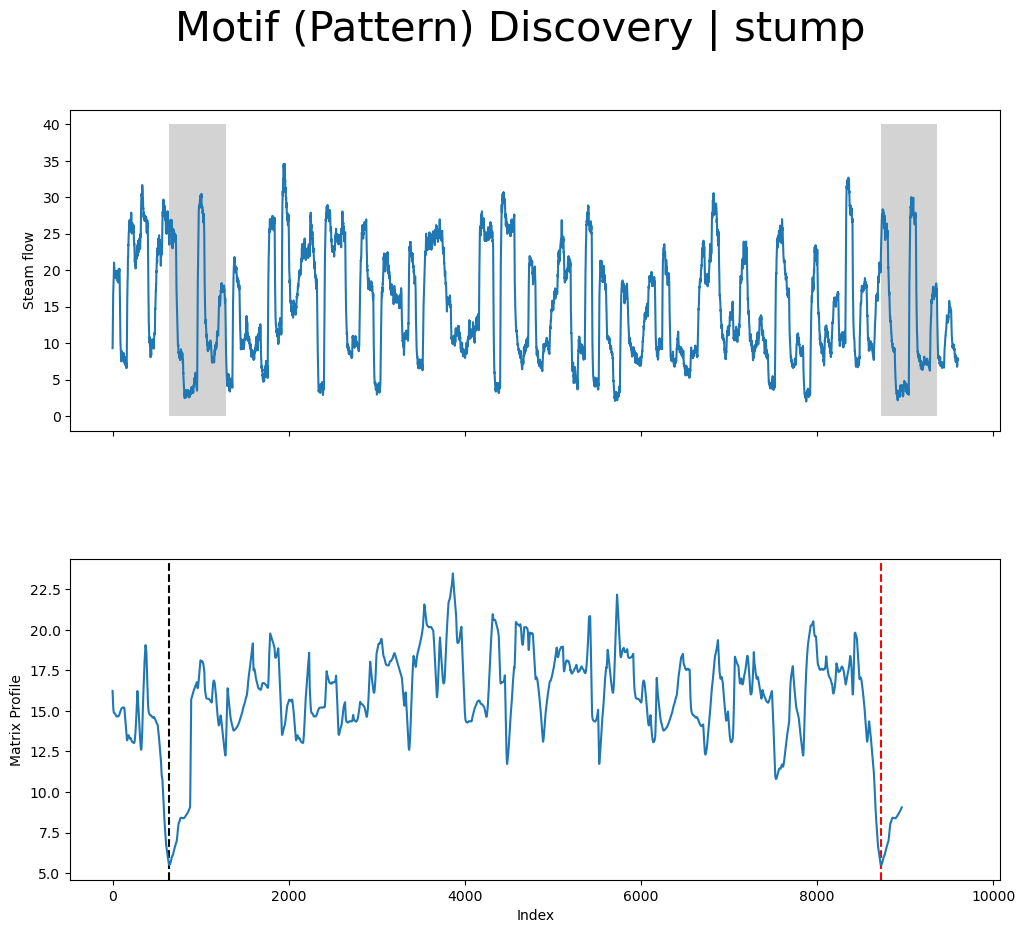

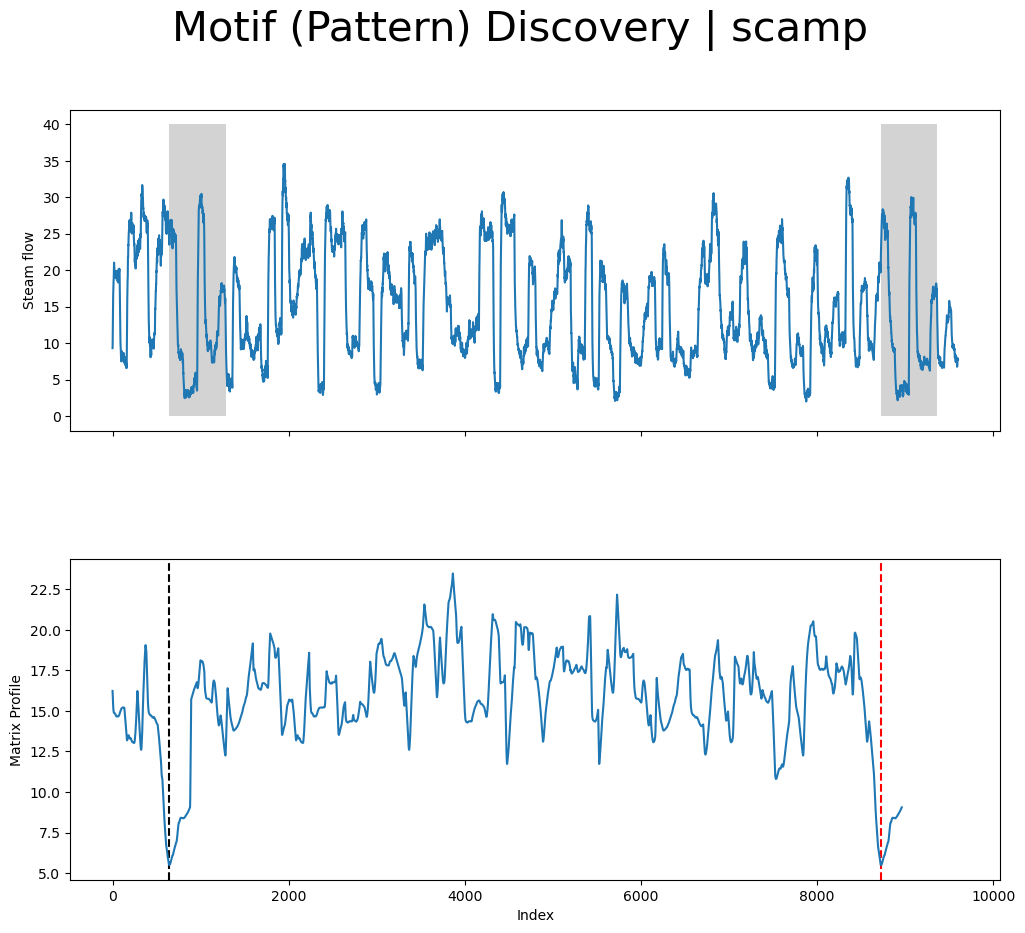

In [18]:
steam_mps.plot_motif(ts_name = 'Steam flow', id = 0, idx = stumpy_idxs[0], nearest_neighbor_idx = stumpy_idxs[1], title_fontsize = '30', other_fontsize = '10')
steam_mps.plot_motif(ts_name = 'Steam flow', id = 1, idx = stumpy_idxs[0], nearest_neighbor_idx = stumpy_idxs[1], title_fontsize = '30', other_fontsize = '10')

## Discord / Anomaly

In [19]:
#mp_stumpy_sorted = np.argsort( steam_mps.matrix_profiles[0].distances )
#mp_scamp_sorted =  np.argsort( steam_mps.matrix_profiles[1].distances )

#discord_idx_stumpy = mp_stumpy_sorted[-1]

#discord_idx_scamp = mp_scamp_sorted[-1]
#print( steam_mps.matrix_profiles[1].distances[stumpy_idxs[0]])
steam_mps.get_anomaly_idx(0)
steam_mps.get_anomaly_idx(1)
discord_idx_stumpy = steam_mps.matrix_profiles[0].discord_idx
discord_idx_scamp = steam_mps.matrix_profiles[1].discord_idx
print(f"Stumpy: The discord is located at index {discord_idx_stumpy}")
print(f"Scamp: The discord is located at index {discord_idx_scamp}")

Stumpy: The discord is located at index 3864
Scamp: The discord is located at index 3864


In [20]:
print("Stumpy | Discord: [", steam_mps.matrix_profiles[0].distances[discord_idx_stumpy],",", steam_mps.matrix_profiles[0].index[discord_idx_stumpy], "]")
print("Scamp |  Discord: [", steam_mps.matrix_profiles[1].distances[discord_idx_scamp], ",",steam_mps.matrix_profiles[1].index[discord_idx_scamp], "]")

Stumpy | Discord: [ 23.47616836730202 , 4755 ]
Scamp |  Discord: [ 23.476168 , 4755 ]


The subsequence located at this global maximum is also referred to as a discord, novelty, or “potential anomaly”:

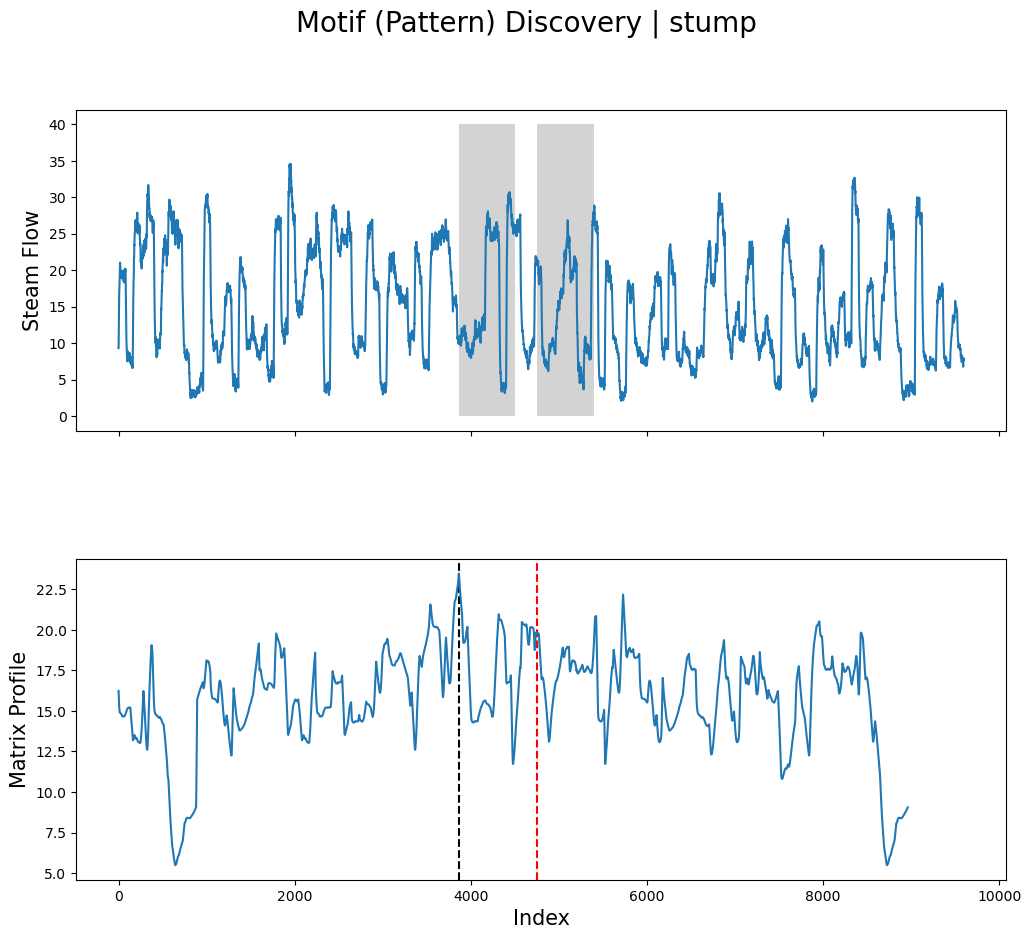

In [21]:
steam_mps.plot_motif(
    ts_name = 'Steam Flow', 
    id = 0, 
    idx = steam_mps.matrix_profiles[0].discord_idx, 
    nearest_neighbor_idx = steam_mps.matrix_profiles[0].discord_nearest_neighbor_idx, 
    title_fontsize = '20',
    other_fontsize = '15'
)

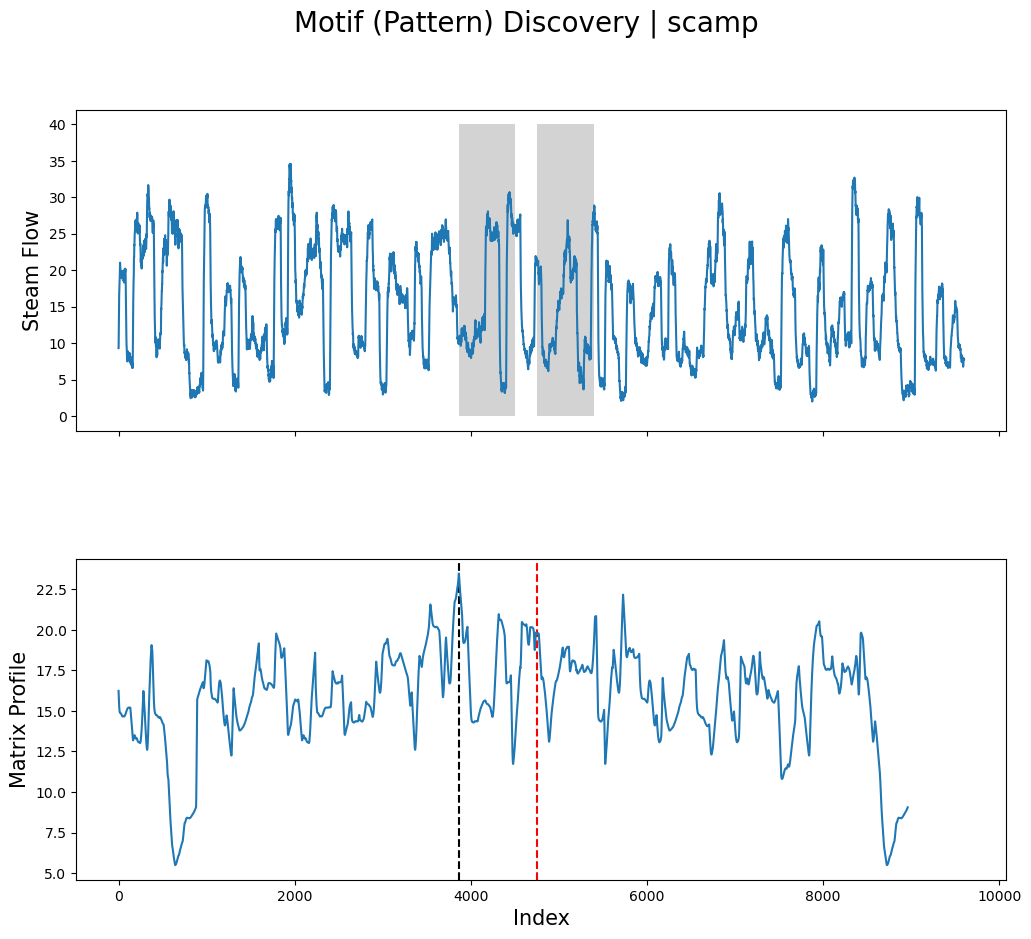

In [22]:
steam_mps.plot_motif(
    ts_name = 'Steam Flow', 
    id = 1, 
    idx = steam_mps.matrix_profiles[1].discord_idx, 
    nearest_neighbor_idx = steam_mps.matrix_profiles[1].discord_nearest_neighbor_idx, 
    title_fontsize = '20',
    other_fontsize = '15'
)

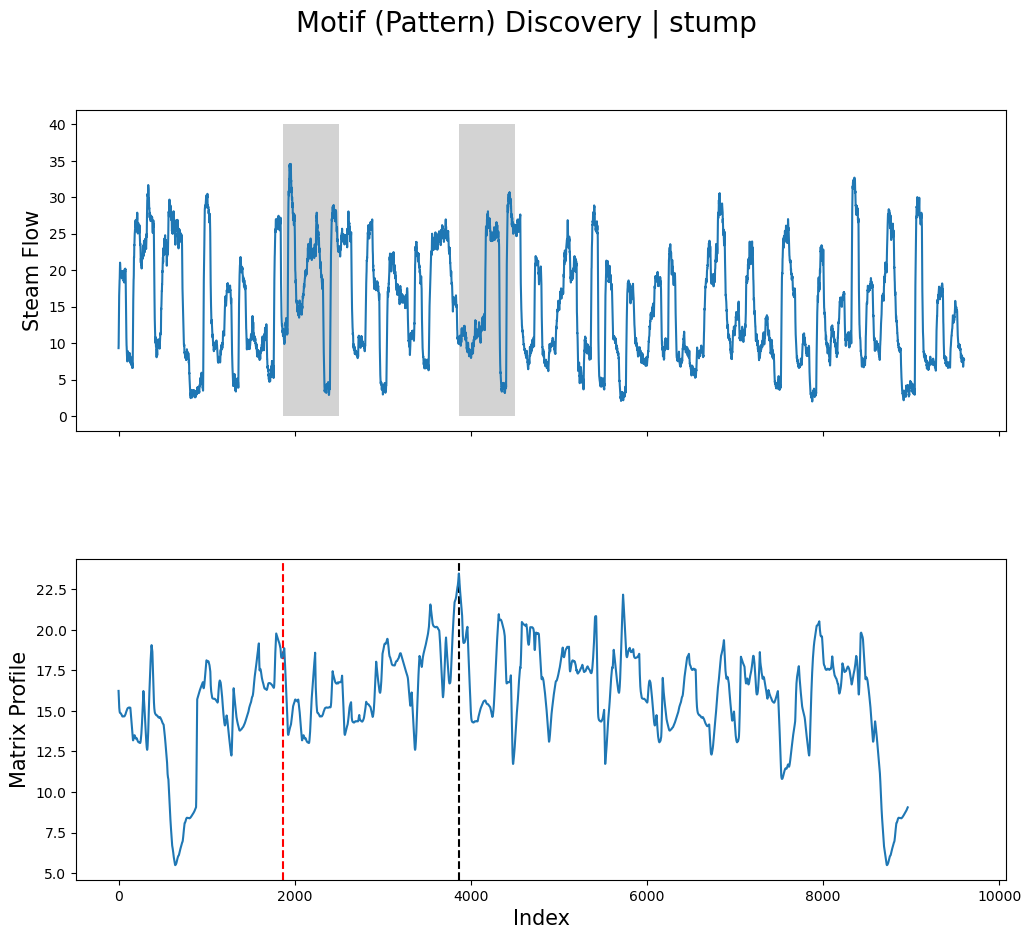

In [23]:
steam_mps.plot_motif(
    ts_name = 'Steam Flow', 
    id = 0, 
    idx = steam_mps.matrix_profiles[0].discord_idx, 
    nearest_neighbor_idx = steam_mps.matrix_profiles[0].discord_nearest_neighbor_idx_left, 
    title_fontsize = '20',
    other_fontsize = '15'
)

Intentando ver la matriz Distance Profile al completo

In [24]:
steam_flow = steam_df['steam flow'].values
#No nans
steam_flow = [ 0 if np.isnan(x) else x for x in steam_flow ]

## Cogiendo Distance Matrix al completo 
> En busca del MPlot

In [25]:
steam_mps.data
steam_mps.subsequence_len
# Ensure no nans 
steam_mps.data = [ 0 if np.isnan(x) else x for x in steam_mps.data ]

In [26]:
#n = len(steam_flow) 
#subsequence_len = m
#print("Expected: ", len(steam_flow) - m + 1)

In [27]:
#MPlot_matrix_stumpy = np.empty((n - m + 1, n - m + 1))
#MPlot_matrix_scamp = np.empty((n - m + 1, n - m + 1))

In [28]:
mplot_stumpy = mp.MatrixProfilePlot(data = steam_mps.data, subsequence_len = steam_mps.subsequence_len)
mplot_scamp  = mp.MatrixProfilePlot(data = steam_mps.data, subsequence_len = steam_mps.subsequence_len)

In [29]:
reference_idx = np.random.randint(low=0, high=len(steam_flow) - steam_mps.subsequence_len)
reference_subseq = steam_flow[reference_idx:reference_idx + steam_mps.subsequence_len]

### Calcular el Distance Profile para cada subsecuencia en la serie temporal respecto a la secuencia de referencia

In [31]:
mplot_stumpy.data_b = reference_subseq
mplot_stumpy.compute(
    subsequence_len = mplot_stumpy.subsequence_len,
    mp_method       = 'stump',
    dm_method       = 'stump',
    time_flag       = True,
    verbose         = 1
)

MatrixProfilePlot | Distance: z_normalized_euclidean_distance
MatrixProfilePlot | Compute | Range [0:640, 0:9600]
[ MPlot | Compute ] | -->  Downsample TA
[ MPlot | Compute ] | Downsample TA ~ 640 ---> 
[ MPlot | Compute ] | -->  Downsample TB
[ MPlot | Compute ] | Downsample TB_paa ~ 9600 ---> 
[ MPlot | Compute ] |Downsample -->
MPlot | Compute | --> Ensure parameters 
MPlot | Compute | --> provide_len 
[ MPlot | Compute ] | Ensure Parameters TB_paa ~ 9600 ---> 
MatrixProfilePlot | Compute | Final Range [0:644, 0:640]
MPlot | Compute | --> Instantiate DM & MP | TA ~ 640 | TB ~ 9600
MPlot | Compute | ... Checking inicializations ...
MP_AB self_join True
DM_AB self_join True
DM_AB ~ (0, 0)
MP_AB method: naive
DM_AB method: naive
MP_AB data_b ~ 9600
DM_AB data_b ~ 9600
MPlot | Compute | ... Checking inicializations ...
MPlot | Compute | --> Compute MP
MPlot | Compute | --> Compute DM | Allow experimental:  True
Not parallel
--> Self join TB_i 0 TA [ 9.3029701  9.6626206 10.990955  12.43

/usr/local/share/miniconda3/envs/env/lib/python3.10/site-packages/stumpy/core.py:3689: UserWarning: Arrays T_A, T_B are not equal, which implies an AB-join. `ignore_trivial` has been automatically set to `False`.
  warnings.warn(msg)


--> Self join TB_i 1 TA [ 9.3029701  9.6626206 10.990955  12.430107  13.681666  14.608886
 15.7132    16.536307  17.025369  17.61613   18.101964  18.617838
 18.635723  18.751322  19.508894  20.456632  20.896455  21.027555
 20.836174  20.700635  20.394276  20.221607  19.741009  19.849174
 19.753394  19.77857   19.799859  19.439141  19.584162  19.499002
 19.649351  19.328394  19.169509  19.235623  19.278401  19.340028
 19.342076  19.112734  18.867467  19.073703  19.238704  19.330707
 19.74182   19.829021  19.73419   19.722264  19.838407  19.686409
 19.420519  19.458585  19.388755  19.331936  19.706821  19.818001
 19.503039  18.989663  18.621073  18.534034  18.593332  18.664088
 18.542793  18.38165   18.366319  18.358475  18.310149  18.671321
 19.095534  19.519949  19.652749  19.952451  20.146499  19.887907
 19.82438   19.962698  20.110549  20.095481  20.207923  20.001645
 20.070029  19.7414    19.751994  18.594969  17.311783  16.332961
 15.4192    14.261018  13.209498  11.8162    10.9800

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [35]:
#mplot_stumpy.data_b = reference_subseq,
#mplot_stumpy.compute(
    #subsequence_len = mplot_stumpy.subsequence_len,
    #mp_method       = 'stump',
#    dm_method       = 'scamp',
#    time_flag       = True,
#    verbose         = 1
#)

In [40]:
#? mplot_stumpy.plot

In [41]:
#mplot_stumpy.plot(ts_name = 'Steam flow', mp_label = "Stumpy")
#mplot_scamp.plot('Steam flow', "Scamp")

### Calcular el Distance Profile para cada subsecuencia en la serie temporal al completo

In [43]:
mplot_stumpy.data_b = None
mplot_stumpy.compute(
    subsequence_len = mplot_stumpy.subsequence_len,
    mp_method       = 'stump',
    dm_method       = 'stump',
    time_flag       = True,
    verbose         = 0
)

Not parallel
--> Self join TB_i 0 TA [ 9.3029701  9.6626206 10.990955  ...  7.8568536  7.799764   7.7678673]
--> Self join TB_i 0 TB~ 14
--> Self join TB_i 1 TA [ 9.3029701  9.6626206 10.990955  ...  7.8568536  7.799764   7.7678673]
--> Self join TB_i 1 TB~ 14
--> Self join TB_i 2 TA [ 9.3029701  9.6626206 10.990955  ...  7.8568536  7.799764   7.7678673]
--> Self join TB_i 2 TB~ 14
--> Self join TB_i 3 TA [ 9.3029701  9.6626206 10.990955  ...  7.8568536  7.799764   7.7678673]
--> Self join TB_i 3 TB~ 14
--> Self join TB_i 4 TA [ 9.3029701  9.6626206 10.990955  ...  7.8568536  7.799764   7.7678673]
--> Self join TB_i 4 TB~ 14
--> Self join TB_i 5 TA [ 9.3029701  9.6626206 10.990955  ...  7.8568536  7.799764   7.7678673]
--> Self join TB_i 5 TB~ 14
--> Self join TB_i 6 TA [ 9.3029701  9.6626206 10.990955  ...  7.8568536  7.799764   7.7678673]
--> Self join TB_i 6 TB~ 14
--> Self join TB_i 7 TA [ 9.3029701  9.6626206 10.990955  ...  7.8568536  7.799764   7.7678673]
--> Self join TB_i 7 TB

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


KeyboardInterrupt: 

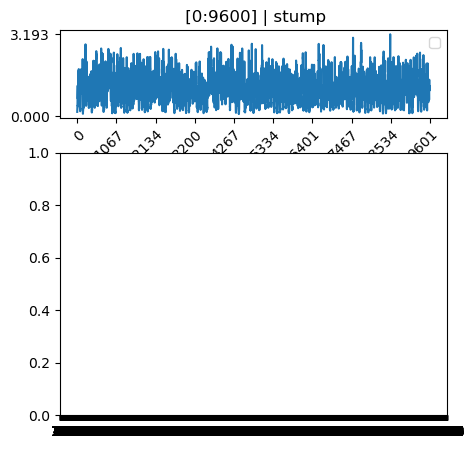

In [49]:
#mplot_stumpy.plot('Steam flow', "Stumpy")
mplot_stumpy.plot()

In [ ]:
mplot_stumpy.data_b = None
mplot_stumpy.compute(
    subsequence_len = mplot_stumpy.subsequence_len,
    mp_method       = 'stump',
    dm_method       = 'scamp',
    time_flag       = True,
    verbose         = 0
)

In [ ]:
print(len(steam_flow))
print(mplot_stumpy.distances.shape)
print(mplot_scamp.distances.shape)

In [ ]:
#mplot_scamp.plot('Steam flow', "Scamp")
mplot_scamp.plot()